<a href="https://colab.research.google.com/github/chefdarek/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module3-dimensionality-reduction/High_Dimensional_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

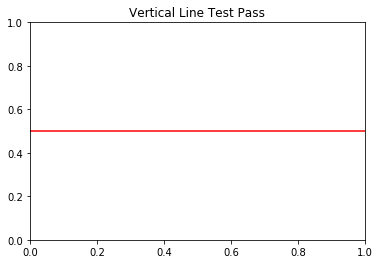

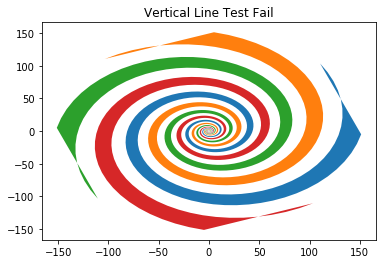

In [2]:
import matplotlib.pyplot as plt

# VLT pass
output_vector = [1, 3]
# Plot the Vectors
plt.axhline(y=0.5, color='r', linestyle='-')
plt.title("Vertical Line Test Pass")
plt.show()
#VLT FAIL
theta = np.arange(0, 8*np.pi, 0.1)
a = 1
b = .2

for dt in np.arange(0, 2*np.pi, np.pi/2.0):

    x = a*np.cos(theta + dt)*np.exp(b*theta)
    y = a*np.sin(theta + dt)*np.exp(b*theta)

    dt = dt + np.pi/4.0

    x2 = a*np.cos(theta + dt)*np.exp(b*theta)
    y2 = a*np.sin(theta + dt)*np.exp(b*theta)

    xf = np.concatenate((x, x2[::-1]))
    yf = np.concatenate((y, y2[::-1]))

    p1 = plt.fill(xf, yf)


plt.title("Vertical Line Test Fail")
plt.show()

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

Because there are multiple resulting possible solutions/ products of the function

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

Relation 2 has no reused y values that would make it ambiguous

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

3.1.a. 3d input and 4d output
3.2.b 4d input and 2d output




## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

# 
𝑓(𝑎𝑥)=(𝑎𝑥,𝑎𝑥)=𝑎(𝑥,𝑥)=𝑓(𝑥+𝑦)=(𝑥+𝑦,𝑥+𝑦)=(𝑥,𝑥)+(𝑦,𝑦)=𝑓(𝑥)+𝑓(𝑦).Yes, but there is no information on the size of the 3rd dimension so the function must be bound in the space and not span its ....volume but only an area in the dimension, I guess.𝑎𝑓(𝑥)
𝑓(𝑥+𝑦)=(𝑥+𝑦,𝑥+𝑦)=(𝑥,𝑥)+(𝑦,𝑦)=𝑓(𝑥)+𝑓(𝑦)

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

In [ ]:
p = np.array([
    [1,3],
    [2,-1]
])
    
q = np.array([
    [4, 1, 2],
    [2,-1,3],
    [5, -2, 1]
])

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [4]:
t1 = np.array([2,2])
t2 = np.array([2,2,2]) 
test_p = np.matmul(t1, p)
print(test_p)
test_q = np.matmul(t2, q)
print(test_q)

[6 4]
[22 -4 12]


# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

They are vectors in a transformation that do not change orientation but only grow or shrink in thier span

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

High dimensional data is expensive to calculate, usually not easy to visualize, and loaded with possible redundant data that does not actually add rich contex information.

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

You should have at least 5 times the observations as you have parameters or features. Some would argue the squared some, depending on your expected output or model.

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [5]:
import seaborn as sns
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')
df.head()
df.isna().sum()
label = df.species
df = df.drop('species', axis=1)
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width
39,5.1,3.4,1.5,0.2
27,5.2,3.5,1.5,0.2
28,5.2,3.4,1.4,0.2
82,5.8,2.7,3.9,1.2
109,7.2,3.6,6.1,2.5
110,6.5,3.2,5.1,2.0
55,5.7,2.8,4.5,1.3
101,5.8,2.7,5.1,1.9
33,5.5,4.2,1.4,0.2
45,4.8,3.0,1.4,0.3


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
test_StandardScaler = np.array(df)

In [9]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(test_StandardScaler)
scaled_data.T #TEST

array([[-9.00681170e-01, -1.14301691e+00, -1.38535265e+00,
        -1.50652052e+00, -1.02184904e+00, -5.37177559e-01,
        -1.50652052e+00, -1.02184904e+00, -1.74885626e+00,
        -1.14301691e+00, -5.37177559e-01, -1.26418478e+00,
        -1.26418478e+00, -1.87002413e+00, -5.25060772e-02,
        -1.73673948e-01, -5.37177559e-01, -9.00681170e-01,
        -1.73673948e-01, -9.00681170e-01, -5.37177559e-01,
        -9.00681170e-01, -1.50652052e+00, -9.00681170e-01,
        -1.26418478e+00, -1.02184904e+00, -1.02184904e+00,
        -7.79513300e-01, -7.79513300e-01, -1.38535265e+00,
        -1.26418478e+00, -5.37177559e-01, -7.79513300e-01,
        -4.16009689e-01, -1.14301691e+00, -1.02184904e+00,
        -4.16009689e-01, -1.14301691e+00, -1.74885626e+00,
        -9.00681170e-01, -1.02184904e+00, -1.62768839e+00,
        -1.74885626e+00, -1.02184904e+00, -9.00681170e-01,
        -1.26418478e+00, -9.00681170e-01, -1.50652052e+00,
        -6.58345429e-01, -1.02184904e+00,  1.40150837e+0

In [10]:
# PCA subtract the mean, divide by std, Manual 
v_list = ['sepal_length','sepal_width','petal_length','petal_width']
for v in v_list:     
  df[v] = (df[v] - df[v].mean())/df[v].std()
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.897674,1.028611,-1.336794,-1.308593
1,-1.139200,-0.124540,-1.336794,-1.308593
2,-1.380727,0.336720,-1.393470,-1.308593
3,-1.501490,0.106090,-1.280118,-1.308593
4,-1.018437,1.259242,-1.336794,-1.308593


In [11]:
dataset = np.array(df)
dataset

array([[-8.97673879e-01,  1.02861128e+00, -1.33679402e+00,
        -1.30859282e+00],
       [-1.13920048e+00, -1.24540379e-01, -1.33679402e+00,
        -1.30859282e+00],
       [-1.38072709e+00,  3.36720285e-01, -1.39346985e+00,
        -1.30859282e+00],
       [-1.50149039e+00,  1.06089953e-01, -1.28011819e+00,
        -1.30859282e+00],
       [-1.01843718e+00,  1.25924161e+00, -1.33679402e+00,
        -1.30859282e+00],
       [-5.35383973e-01,  1.95113261e+00, -1.16676652e+00,
        -1.04652483e+00],
       [-1.50149039e+00,  7.97980949e-01, -1.33679402e+00,
        -1.17755883e+00],
       [-1.01843718e+00,  7.97980949e-01, -1.28011819e+00,
        -1.30859282e+00],
       [-1.74301699e+00, -3.55170711e-01, -1.33679402e+00,
        -1.30859282e+00],
       [-1.13920048e+00,  1.06089953e-01, -1.28011819e+00,
        -1.43962681e+00],
       [-5.35383973e-01,  1.48987194e+00, -1.28011819e+00,
        -1.30859282e+00],
       [-1.25996379e+00,  7.97980949e-01, -1.22344235e+00,
      

In [12]:
cov_matrix = np.cov(dataset.T)
cov_matrix

array([[ 1.        , -0.10936925,  0.87175416,  0.81795363],
       [-0.10936925,  1.        , -0.4205161 , -0.35654409],
       [ 0.87175416, -0.4205161 ,  1.        ,  0.9627571 ],
       [ 0.81795363, -0.35654409,  0.9627571 ,  1.        ]])

In [13]:
test_Covmat = np.cov(test_StandardScaler.T)
test_Covmat #These do not match??

array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

In [14]:
values, vectors = np.linalg.eig(cov_matrix)
print(f"These are the Eigen Values from Manual Stdz: {values}")
print("\n These are the Eigen Vectors\n from Manual Stdz",vectors)

These are the Eigen Values from Manual Stdz: [2.91081808 0.92122093 0.14735328 0.02060771]

 These are the Eigen Vectors
 from Manual Stdz [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


In [15]:
values2, vectors2 = np.linalg.eig(test_Covmat)
print(f"These are the Eigen Values from Manual Stdz: {values2}")
print("\n These are the Eigen Vectors\n from Manual Stdz",vectors2)

These are the Eigen Values from Manual Stdz: [4.22484077 0.24224357 0.07852391 0.02368303]

 These are the Eigen Vectors
 from Manual Stdz [[ 0.36158968 -0.65653988 -0.58099728  0.31725455]
 [-0.08226889 -0.72971237  0.59641809 -0.32409435]
 [ 0.85657211  0.1757674   0.07252408 -0.47971899]
 [ 0.35884393  0.07470647  0.54906091  0.75112056]]


In [ ]:
#sort????Eigen

In [17]:
P = vectors.T.dot(dataset.T)
print("\n Projected Data Sample: \n", P.T)


 Projected Data Sample: 
 [[-2.25698063e+00 -5.04015404e-01 -1.21536190e-01  2.29962838e-02]
 [-2.07945912e+00  6.53216394e-01 -2.26492063e-01  1.02863642e-01]
 [-2.36004408e+00  3.17413945e-01  5.13077379e-02  2.77323192e-02]
 [-2.29650366e+00  5.73446613e-01  9.85303586e-02 -6.60900544e-02]
 [-2.38080159e+00 -6.72514411e-01  2.13563034e-02 -3.72724209e-02]
 [-2.06362348e+00 -1.51347827e+00  3.05818064e-02  4.38408784e-03]
 [-2.43754534e+00 -7.43137171e-02  3.41055070e-01 -3.79693659e-02]
 [-2.22638327e+00 -2.46787172e-01 -8.22987560e-02 -2.54200029e-02]
 [-2.33413810e+00  1.09148977e+00  1.53049668e-01 -2.67043670e-02]
 [-2.18136797e+00  4.47131117e-01 -2.45736283e-01 -3.97740567e-02]
 [-2.15626287e+00 -1.06702096e+00 -2.63127870e-01  1.52500486e-02]
 [-2.31960686e+00 -1.58057946e-01  9.98311719e-02 -1.34104994e-01]
 [-2.21665672e+00  7.06750478e-01 -2.22469221e-01  2.62183044e-03]
 [-2.63090249e+00  9.35149145e-01  1.88937073e-01 -1.93571700e-02]
 [-2.18497165e+00 -1.88366805e+00 -

In [18]:
P2 = vectors2.T.dot(test_Covmat.T)
print("\n Projected Data Sample: \n", P2.T)


 Projected Data Sample: 
 [[ 1.52765881 -0.15904257 -0.04562218  0.00751355]
 [-0.34757296 -0.17676813  0.04683308 -0.00767554]
 [ 3.61888075  0.04257852  0.00569487 -0.0113612 ]
 [ 1.51605845  0.01809716  0.04311441  0.01778881]]


CODE LIKE A GIRL IMPLEMENTATION

In [ ]:
file_name = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'


In [20]:
df = pd.read_csv(file_name, sep=',',header=None)
df.head(n=10)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [21]:
class_label = pd.DataFrame(df.iloc[:,-1])
class_label.columns = ['label']
class_label.head(n=10)

,label
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
5,Iris-setosa
6,Iris-setosa
7,Iris-setosa
8,Iris-setosa
9,Iris-setosa


In [22]:
df = df.iloc[:, :-1]
df.head(n=10)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [ ]:
df = df.sub(df.mean(axis=0), axis=1)


In [24]:
df_mat = np.asmatrix(df)
df_mat

matrix([[-7.43333333e-01,  4.46000000e-01, -2.35866667e+00,
         -9.98666667e-01],
        [-9.43333333e-01, -5.40000000e-02, -2.35866667e+00,
         -9.98666667e-01],
        [-1.14333333e+00,  1.46000000e-01, -2.45866667e+00,
         -9.98666667e-01],
        [-1.24333333e+00,  4.60000000e-02, -2.25866667e+00,
         -9.98666667e-01],
        [-8.43333333e-01,  5.46000000e-01, -2.35866667e+00,
         -9.98666667e-01],
        [-4.43333333e-01,  8.46000000e-01, -2.05866667e+00,
         -7.98666667e-01],
        [-1.24333333e+00,  3.46000000e-01, -2.35866667e+00,
         -8.98666667e-01],
        [-8.43333333e-01,  3.46000000e-01, -2.25866667e+00,
         -9.98666667e-01],
        [-1.44333333e+00, -1.54000000e-01, -2.35866667e+00,
         -9.98666667e-01],
        [-9.43333333e-01,  4.60000000e-02, -2.25866667e+00,
         -1.09866667e+00],
        [-4.43333333e-01,  6.46000000e-01, -2.25866667e+00,
         -9.98666667e-01],
        [-1.04333333e+00,  3.46000000e-01, 


Calculating covariance
Now to achieve PCA on the dataset, lets start by calculating covariance matrix of the feature matrix. We will denote covariance matrix as sigma.

$S = (1/n) * XX^T$

In [25]:
# sigma = 1/df_a_mat.shape[0] * np.dot(df_a_mat.transpose(),df_a_mat)
sigma = np.cov(df_mat.T)
sigma

array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

In [26]:
sigma.shape

(4, 4)

In [ ]:
eigVals, eigVec = np.linalg.eig(sigma)

SORTING EIGEN VALUES

In [ ]:
sorted_index = eigVals.argsort()[::-1] 
eigVals = eigVals[sorted_index]
eigVec = eigVec[:,sorted_index]

In [29]:
eigVals

array([4.22484077, 0.24224357, 0.07852391, 0.02368303])

Selecting top k eigen vectors : k=2

In [ ]:
eigVec = eigVec[:,:2]

In [31]:
eigVec

array([[ 0.36158968, -0.65653988],
       [-0.08226889, -0.72971237],
       [ 0.85657211,  0.1757674 ],
       [ 0.35884393,  0.07470647]])

In [ ]:
# Transforming data on new subspace

eigVec = pd.DataFrame(np.real(eigVec))

transformed = df_mat.dot(eigVec)

transformed

In [37]:
final_df = np.hstack((transformed, class_label))
final_df = pd.DataFrame(final_df)
final_df.columns = ['x','y','label']
final_df

,x,y,label
0,-2.68421,-0.326607,Iris-setosa
1,-2.71539,0.169557,Iris-setosa
2,-2.88982,0.137346,Iris-setosa
3,-2.74644,0.311124,Iris-setosa
4,-2.72859,-0.333925,Iris-setosa
5,-2.2799,-0.747783,Iris-setosa
6,-2.82089,0.0821045,Iris-setosa
7,-2.62648,-0.170405,Iris-setosa
8,-2.88796,0.570798,Iris-setosa
9,-2.67384,0.106692,Iris-setosa


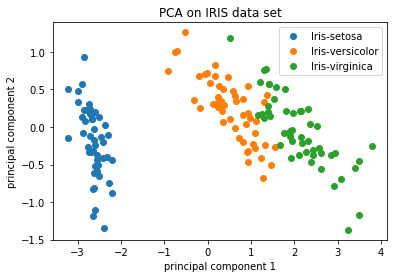

In [36]:
groups = final_df.groupby('label')
figure, axes = plt.subplots()
axes.margins(0.05)
for name, group in groups:
    axes.plot(group.x, group.y, marker='o', linestyle='', ms=6, label=name)
    axes.set_title("PCA on IRIS data set")
axes.legend()
plt.xlabel("principal component 1")
plt.ylabel("principal component 2")
plt.show()